In [1]:
import mellon as ml
import omnipath as op
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pySankey import sankey as sn


c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
db = op.interactions.import_intercell_network(transmitter_params = {"categories":"ligand"}, receiver_params = {"categories": "receptor"})
db = db[np.logical_not(db['genesymbol_intercell_source'].str.startswith('HLA'))]
db = db[np.logical_not(db['genesymbol_intercell_target'].str.startswith('HLA'))]
tgts_all = pd.read_csv('/Users/melis/Documents/Gene-targets/Disease_gene_associations_OpenTargets/hot-encoded-diseases.csv')
tgts_all['gene']=tgts_all['genes']
tgts_all = tgts_all.drop(columns=['genes']).set_index(['gene'])
tgts_all

,AD,ALS,AnorexiaNervosa,BipolarDisorder,BrainAneurysm,EssentialTremor,FrontotemporalDementia,IntracranialHemorrhage,LBD,MajorDepressiveDisorder,...,Narcolepsy,NeuroticDisorder,OCD,PartialEpilepsy,PD,ProgressiveSupranuclearPalsy,RestlessLeg,Schizophrenia,TouretteSyndrome,UnipolarDepression
gene,,,,,,,,,,,,,,,,,,,,,
AATK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ABCA1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCA13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ABCA7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABCB1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ZSCAN26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZSCAN31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [3]:
tgts = tgts_all

In [4]:
source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts, db)

Source hits:  111
% of source hits in total genes of interest:  4.431137724550898
Target hits:  266
% of target hits in total genes of interest:  10.6187624750499


In [5]:
LRs_SCZ = db[['genesymbol_intercell_source','genesymbol_intercell_target']][(db['genesymbol_intercell_source'].isin(list(sum.gene))) | (db['genesymbol_intercell_target'].isin(list(sum.gene)))]

In [6]:
unique_genes = np.unique(list(LRs_SCZ['genesymbol_intercell_source'])+list(LRs_SCZ['genesymbol_intercell_target']))

# Adjacency matrix with entire network linked to targets of interest
# This should include only LRs_SCZ interactions (where at least one of the interactors is linked to SCZ)

adj_LRs = pd.DataFrame(np.zeros(shape=(len(unique_genes), len(unique_genes))), index = unique_genes, columns = unique_genes)

for n in range (0, np.shape(LRs_SCZ)[0]):
    adj_LRs.iloc[adj_LRs.index.get_loc(LRs_SCZ.iloc[n]['genesymbol_intercell_source']), adj_LRs.columns.get_loc(LRs_SCZ.iloc[n]['genesymbol_intercell_target'])] += 1

#Number of cell-cell interactions ligands of interest are involved in
print(adj_LRs.sum(axis = 0).sort_values(ascending=False)[adj_LRs.sum(axis = 0).sort_values(ascending=False).index.isin(list(tgts.index))])

#Number of cell-cell interactions receptors of interest are involved in
adj_LRs.sum(axis = 1).sort_values(ascending=False)[adj_LRs.sum(axis = 1).sort_values(ascending=False).index.isin(list(tgts.index))]

MAPK3    82.0
MAPK1    75.0
STAT3    66.0
CXCR4    51.0
CCR4     46.0
         ... 
IMPG2     0.0
IFNK      0.0
IL12A     0.0
IL12B     0.0
ZPBP2     0.0
Length: 353, dtype: float64


FYN       157.0
TGFB1     103.0
IL2        65.0
HGF        57.0
TYK2       42.0
          ...  
LPP         0.0
LRP1        0.0
LRRC4C      0.0
LRRN3       0.0
AATK        0.0
Length: 353, dtype: float64

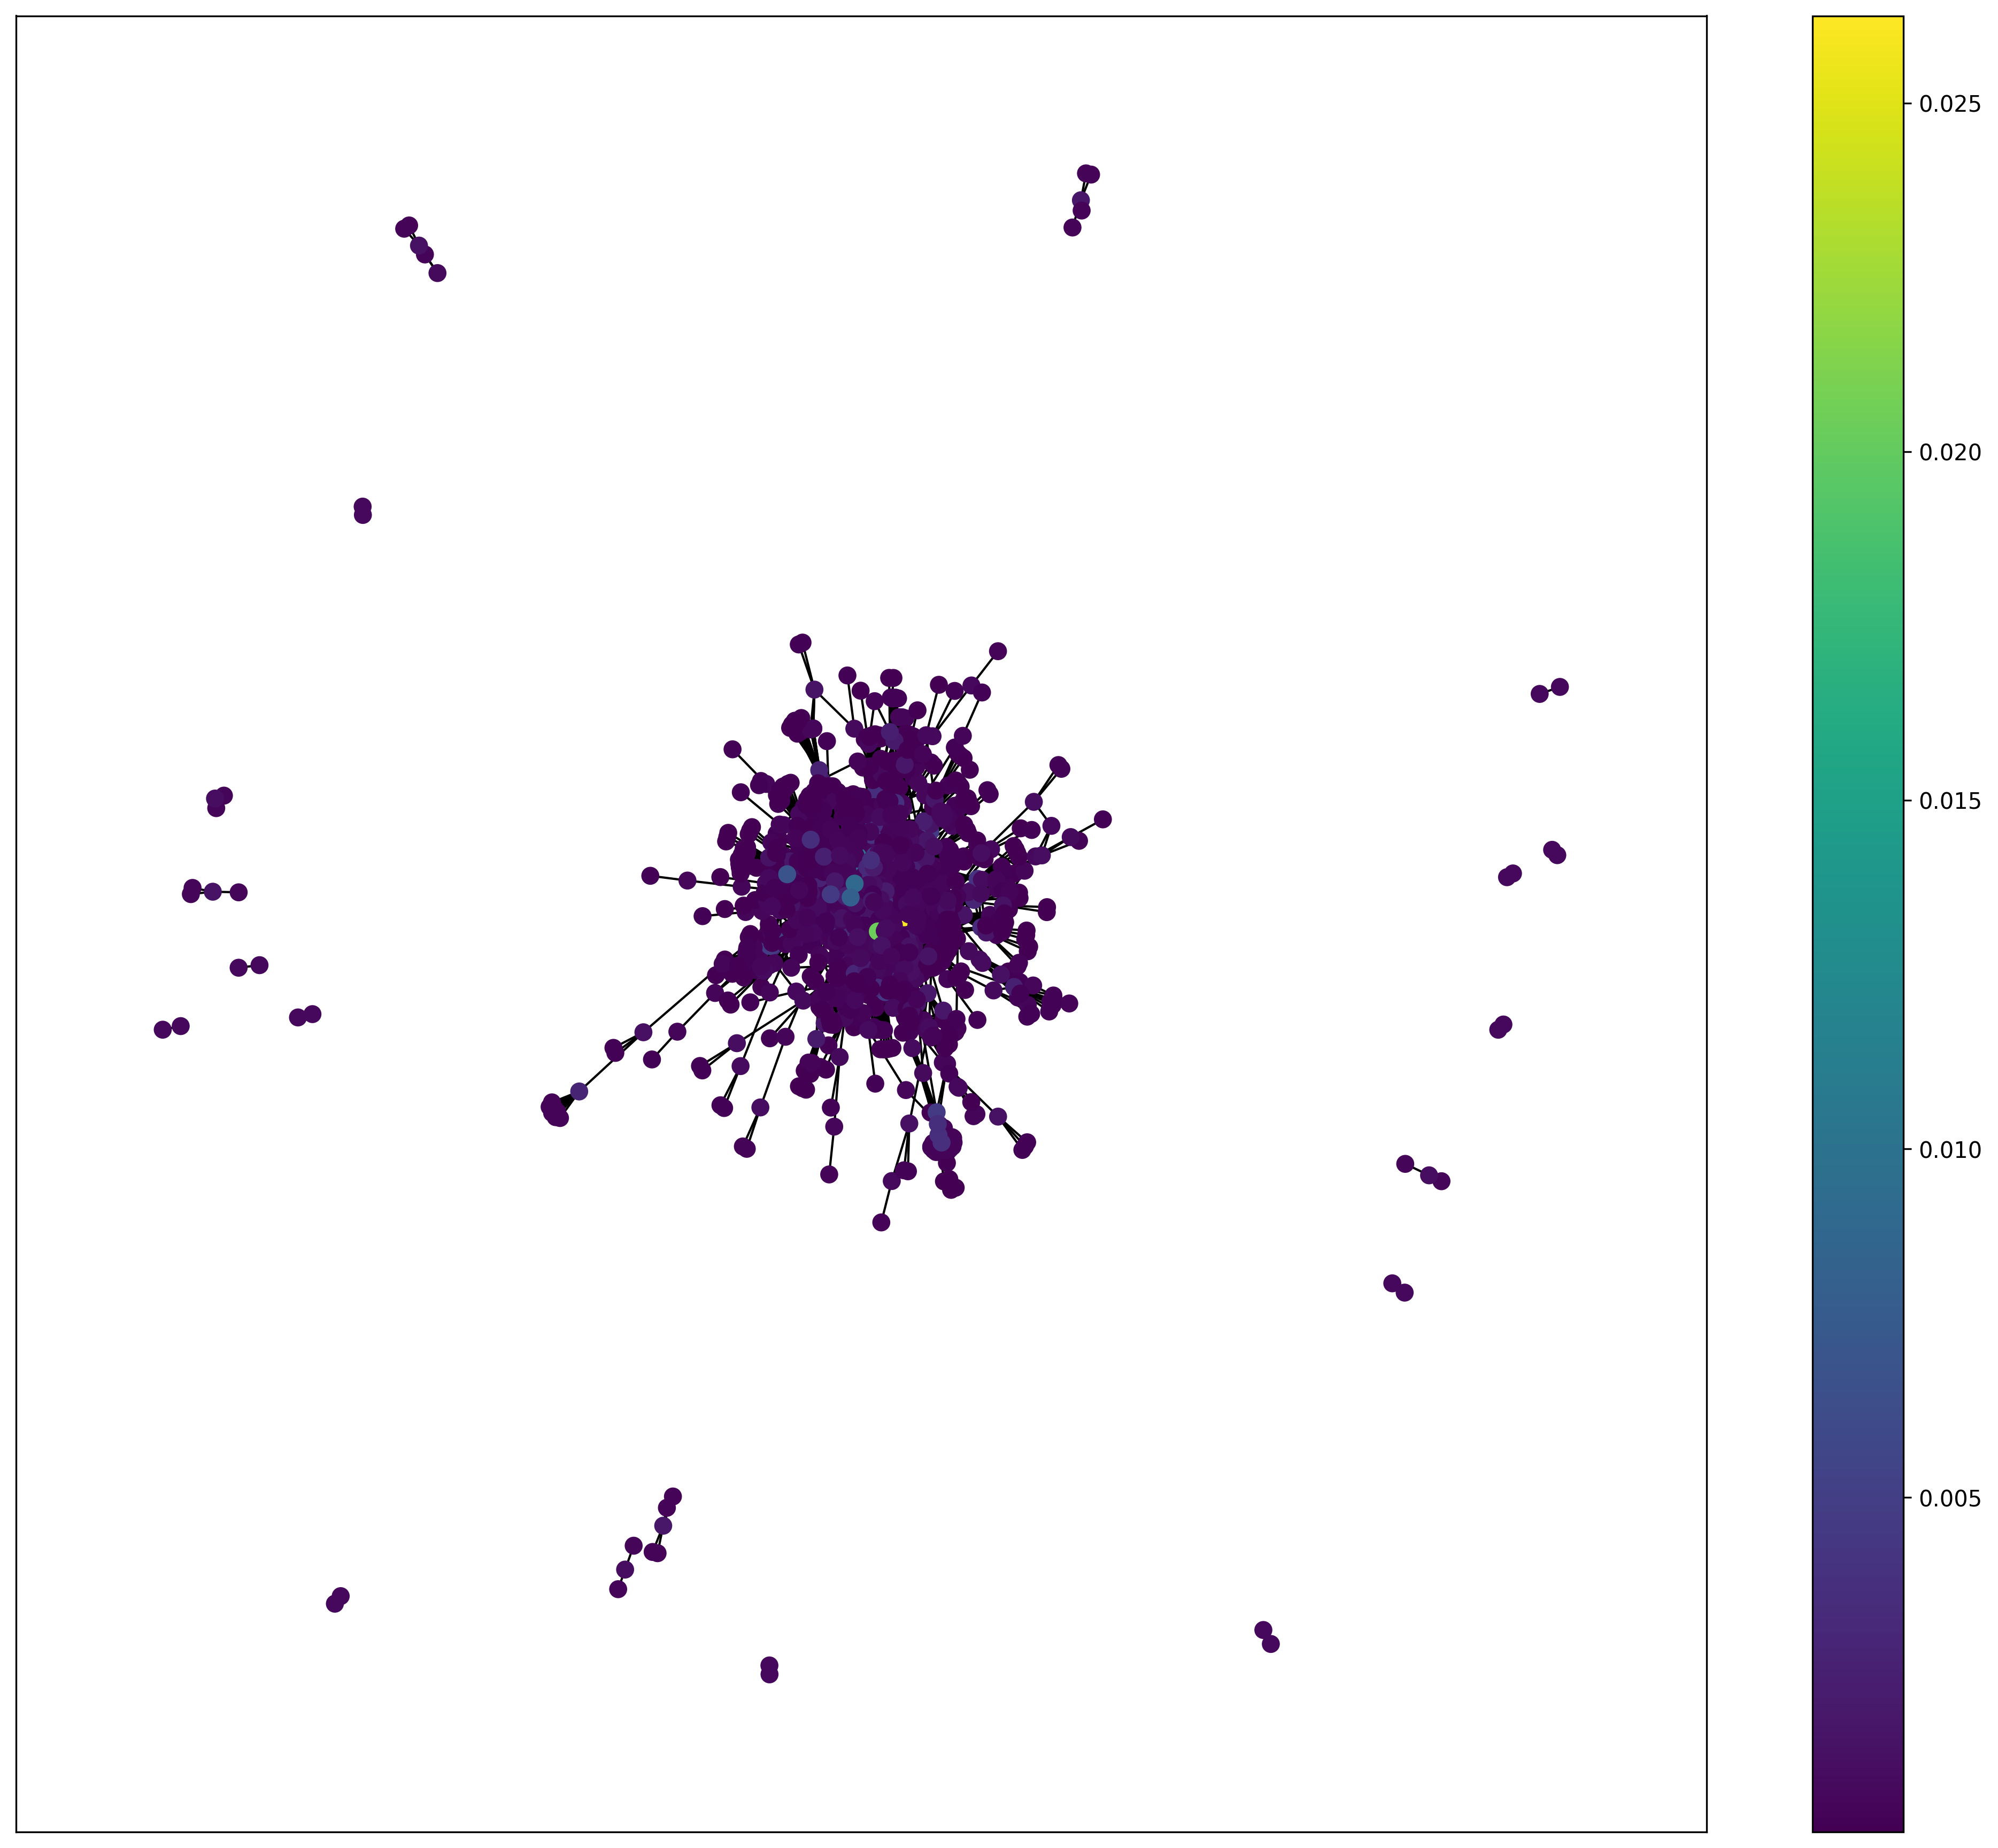

In [7]:
# Overview of LR network and calculating rank of importance with PageRank
import networkx as nx
from matplotlib.pyplot import figure

G = nx.from_pandas_adjacency(adj_LRs)
pgrank = pd.DataFrame.from_dict(nx.pagerank(G, alpha = 0.85, weight = 'weight'), orient = 'index')
pgrank.sort_values(by=[0], ascending = False).to_csv('pagerank_outputs.csv')


colours = []
for i in G.nodes:
        if i in list(pgrank.index):
            colours.append(pgrank.loc[i][0])
        else:
            colours.append(0.0)
len(colours)

plt.figure(figsize=(17,15), dpi = 300)

sm = nx.draw_networkx(G, node_color=colours, vmin=min(colours), vmax=max(colours), cmap=plt.get_cmap("viridis"), with_labels=False, node_size = 50)
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap("viridis"), norm=plt.Normalize(vmin = min(colours), vmax=max(colours)))
sm._A = []
plt.colorbar(sm)
#plt.title('SCZ LR network colored by PageRank score')
plt.show()

In [9]:


comms = ml.network.louvain_communities(G, seed=123, resolution=0.0001)

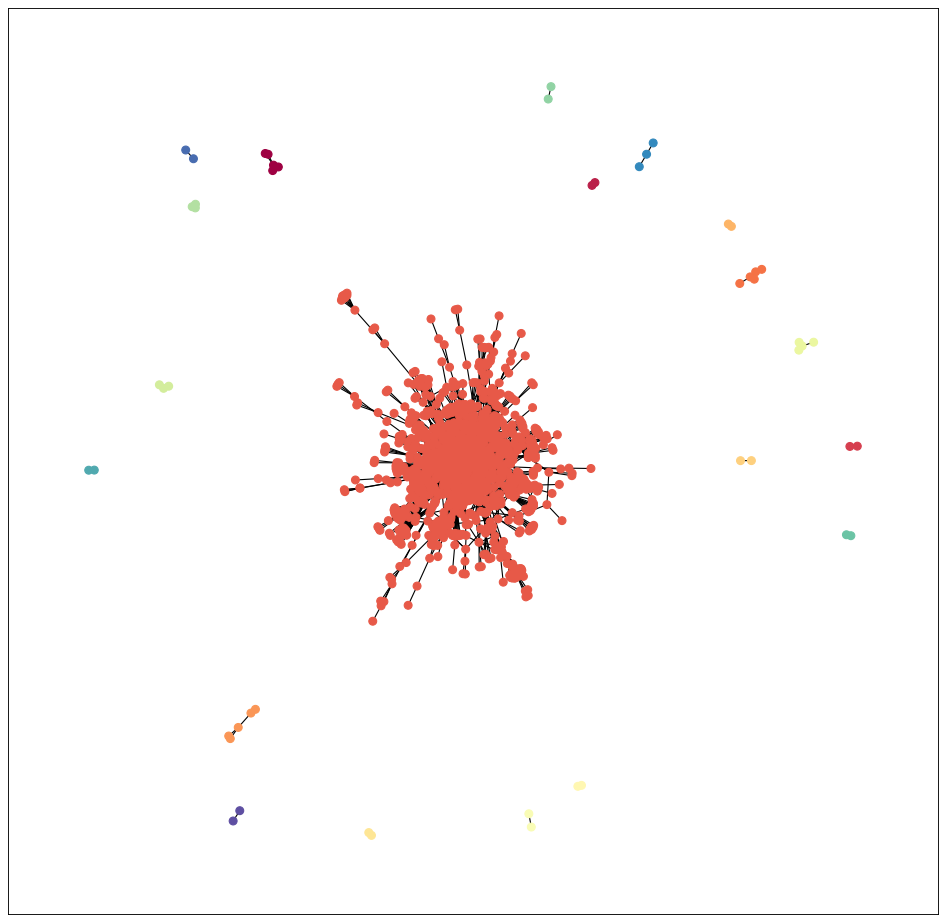

In [10]:
colours = []
for i in G.nodes:
    for m in range(0,20):
        if i in comms[m]:
            colours.append(m)
len(colours)

from matplotlib.pyplot import figure
figure(figsize=(15, 15), dpi=80)


nx.draw_networkx(G, node_color=colours, vmin=min(colours), vmax=max(colours), cmap=plt.get_cmap("Spectral"), with_labels=False, node_size = 50)
plt.show()